<a href="https://colab.research.google.com/github/BlackHawk1809/TSF-GRIP-Task1/blob/main/TSP_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**
**NAME: Ankit Raghav**

**BATCH:GRIPDEC'2020**

# GRIP2020
**Exploratory Data Analysis - Retail**

1.Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

2.As a business manager, try to find out the weak areas where you can work to make more profit.

3.What all business problems you can derive by exploring the data?

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [ ]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## **# Observation**
1.There are 9994 rows and 12 columns

2.Categorical columns-8 and numeric columns-5

3.The target variable is "Profit"

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
print("total number of null values =",data.isnull().sum().sum())

total number of null values = 0


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.duplicated().sum()

17

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:

data=data.drop('Country',axis=1)

In [ ]:
new_col=data[['Ship Mode','Segment','Region','Category']]

In [ ]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [ ]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [ ]:
categorical_col=data[['Ship Mode','Segment','Region','Category','City','State','Sub-Category']]

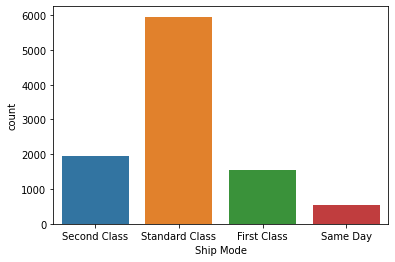

In [ ]:
sns.countplot(x=data['Ship Mode'])

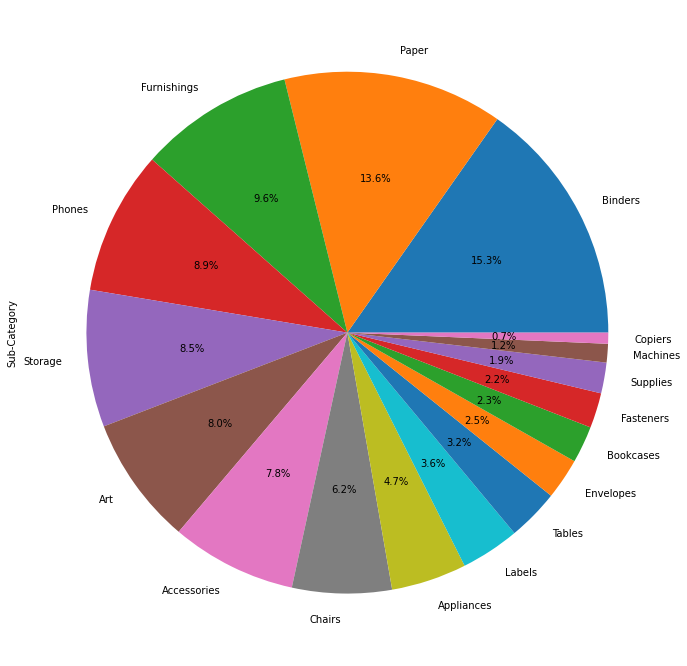

In [ ]:
plt.figure(figsize=(16,12))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

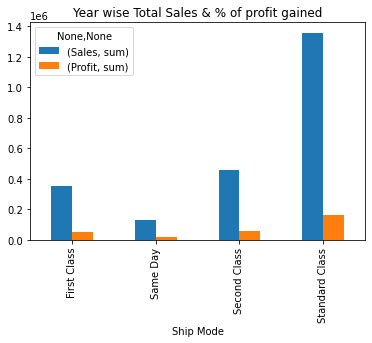

In [ ]:
#Sales per Ship mode
data.groupby('Ship Mode')['Sales','Profit'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

In [ ]:
Top_shipping=data.groupby('Ship Mode').sum().sort_values('Sales',ascending=False)
Top_shipping

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
Standard Class,326946816,1.357316e+06,22756,954.12,163969.2280
Second Class,108033820,4.591770e+05,7418,269.35,57446.6516
First Class,84152470,3.513805e+05,5690,252.97,48953.6561
Same Day,31147971,1.283217e+05,1956,82.75,15871.8869



# **Observation:**
 We can see that Shipping mode - Standard Class generated the highest revenue of about $163969.
**The Total Revenue generated by all the shipping modes - $286239<a class="anchor-link" href="#The-Total-Revenue-generated-by-all-the-shipping-modes---$286239">¶ 

A.In terms of Quantity sold and Discount also high in Standard class

B.Same day ship mode generating the least Profit

C.The discount given and sales price also less in Sameday shipmode

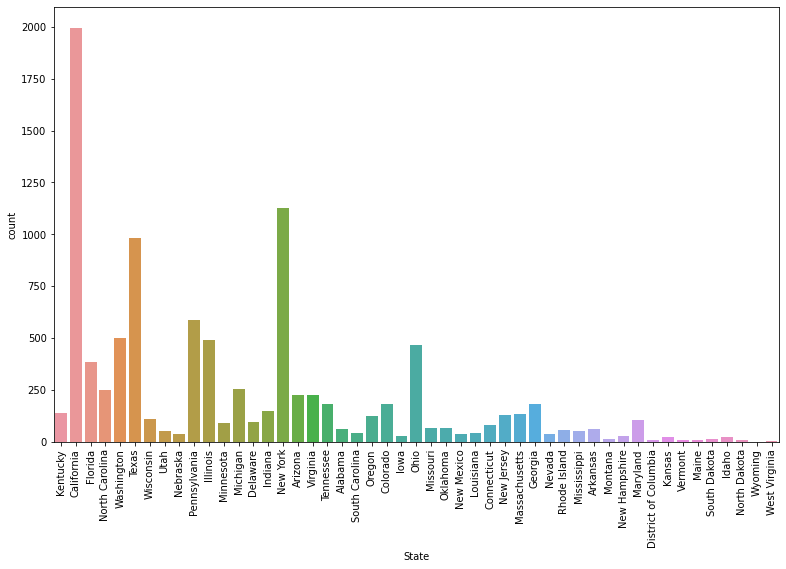

In [ ]:
plt.figure(figsize=(13,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_state=data.groupby('State').sum().sort_values('Profit',ascending=False)
top_state.head(15)

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
California,183916115,457576.2715,7649,145.6,76330.7891
New York,11825710,310827.1510,4220,62.4,74015.4622
Washington,49269259,138560.8100,1871,32.4,33368.2375
Michigan,12307876,75879.6440,943,1.8,24428.0903
Virginia,5124335,70636.7200,893,0.0,18597.9504
Indiana,6991602,53555.3600,578,0.0,18382.9363
Georgia,5685480,49095.8400,705,0.0,16250.0433
Kentucky,5725336,36591.7500,523,0.0,11199.6966
Minnesota,4932224,29863.1500,331,0.0,10823.1874


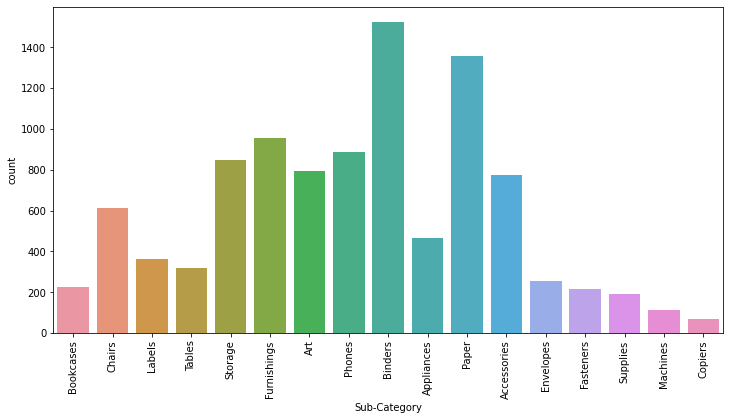

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
Top_region = data.groupby('Region').sum().sort_values('Sales',ascending=False)
Top_region

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
West,292783499,725255.6365,12234,350.00,108329.8079
East,50099338,678435.1960,10609,413.50,91506.3092
Central,151523188,500782.8528,8768,557.14,39655.8752
South,55875052,391721.9050,6209,238.55,46749.4303


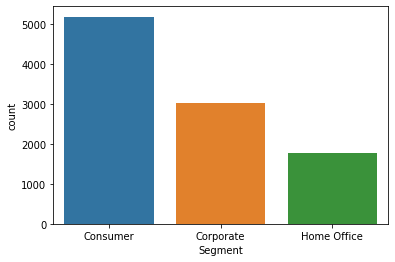

In [ ]:
sns.countplot(x=data['Segment'])

In [ ]:
Top_segment = data.groupby('Segment').sum().sort_values('Profit',ascending=False)
Top_segment

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


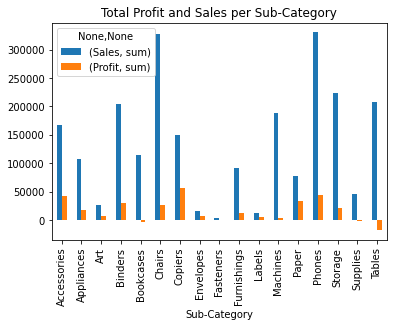

In [ ]:

data.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()


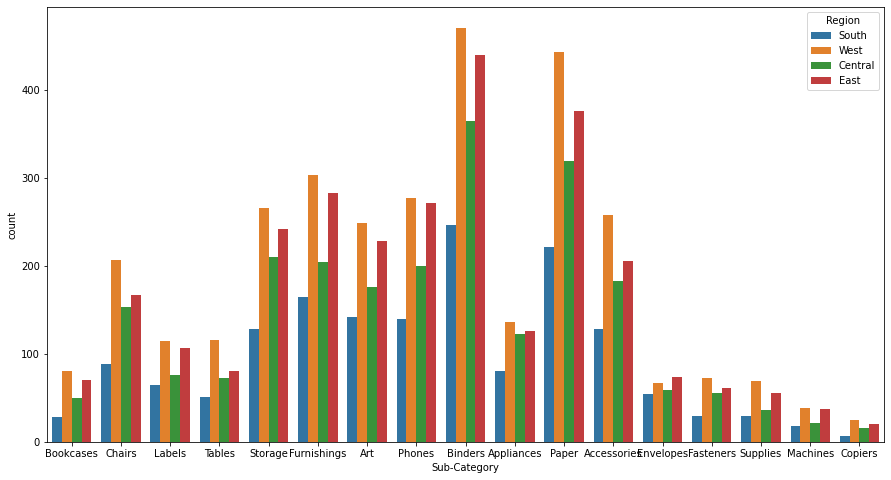

In [ ]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',hue="Region",data=data)
plt.show()

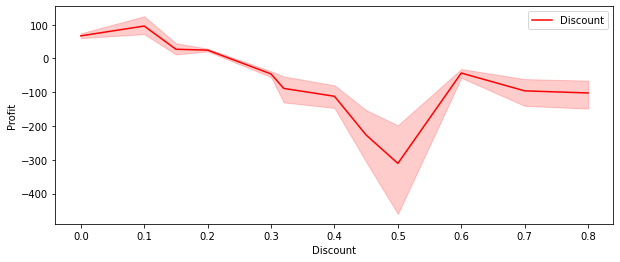

In [ ]:
plt.figure(figsize =(10,4))
sns.lineplot('Discount','Profit',data = data,color = 'r',label = 'Discount')
plt.legend()

In [ ]:

numeric_col=data[['Sales','Quantity','Discount','Profit']]

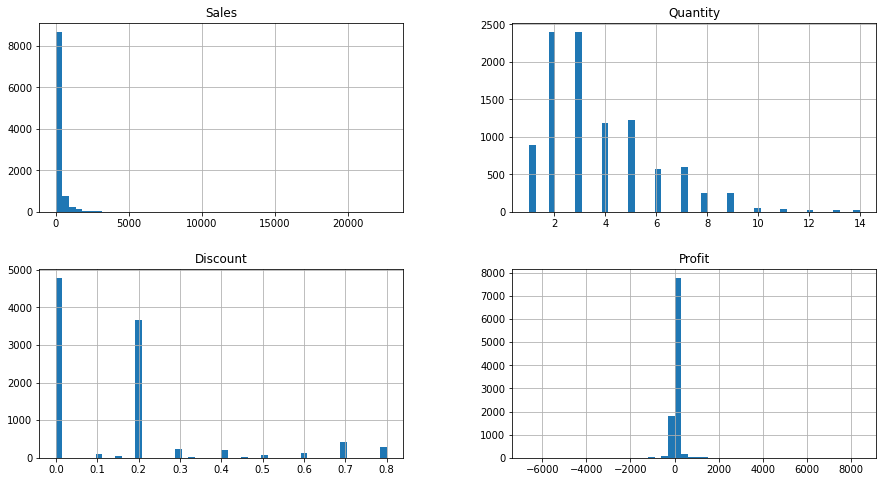

In [ ]:
numeric_col.hist(bins=50,figsize=(15,8))
plt.show()

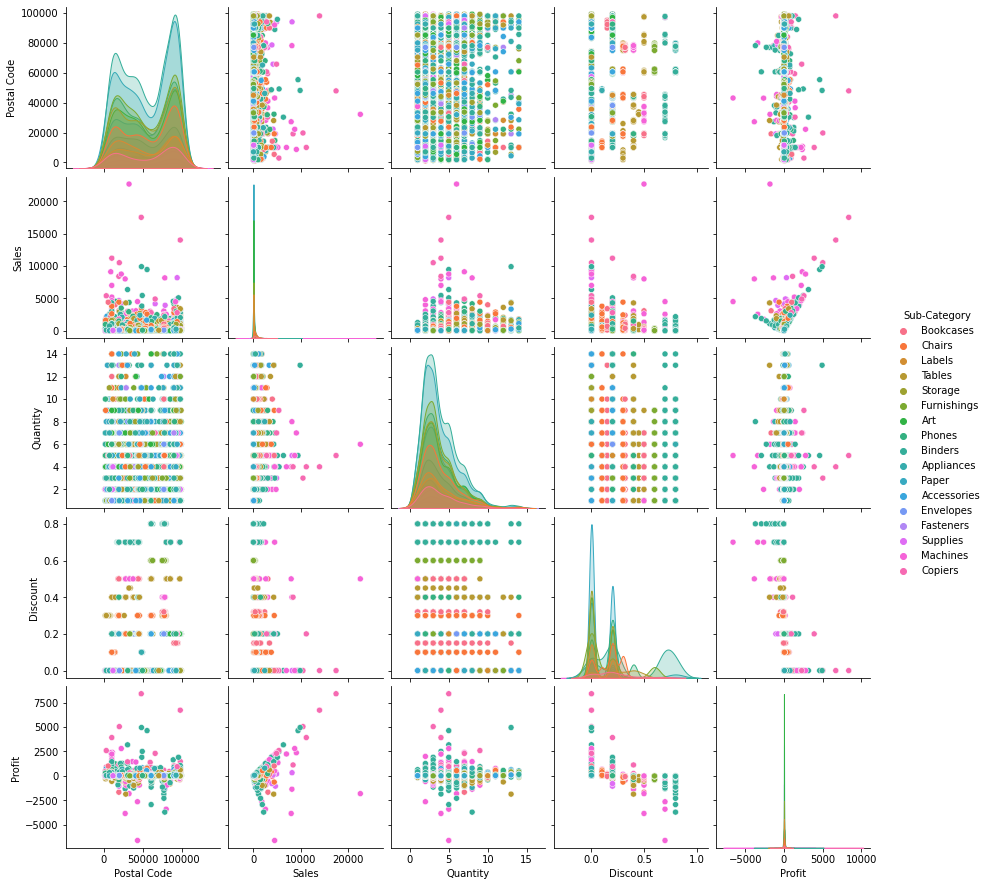

In [ ]:

figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')

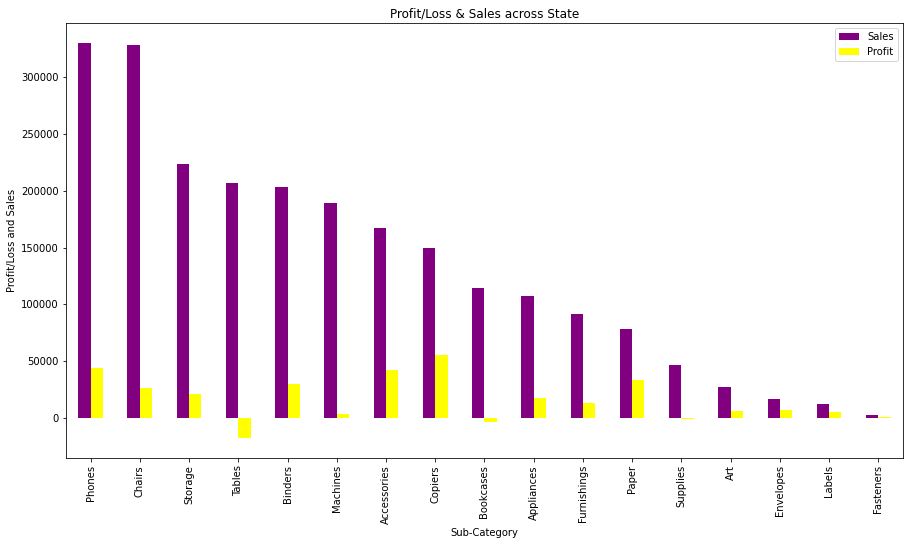

In [ ]:
ps=data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['Purple','yellow'],figsize=(15,8))
plt.title('Profit/Loss & Sales across State')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observations :-

1.Maximum Sales are from Binders,Paper,Furnishings,Phones,Storage,Art,Accessories and Minimum from Copies,Machines,and suppliers.

2.Higher Numbers of Buyers are from Calofornia and New York.

3.Most Customers tends to Buy quantity of 2 and 3.

4.Discount give Maximum is 0% to 20%.

5.There IS NO CORRELATION between Profit and Discount.

6.Profit and Sales are maximum in customer segments and minimum in Home office segments.

7.segments wise sales are almost same in every region.

8.Profits and sales are maximum in west region and minimum in south region.

9.High profit for california and new york.

10.Loss for Texas,Pennsylvania and Ohlo.